# 대기복사학 (AS23570-040) - HW01 (Planck's Law) 

###  

###  대기환경과학과  2학년  202014325  신의철

####  Date : 2021.09.27.

## 1. T = 5800K, T = 3000K, T = 1000K, T = 288K 일 때 Planck function을 그리고 비교하라

In [2]:
# 필요한 모듈 추가
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from scipy.linalg import *
import scipy as sp
import math as m
import warnings

# def plank():에서 overflow warning 발생 무시
warnings.filterwarnings('ignore')

# 각각의 상수 선언
h = 6.63e-34  #플랑크 상수
k = 1.38e-23  #볼츠만 상수
c = 3.0e+8    #빛의 속도

# Planck's Law에서 intensity는 파장과 온도의 함수이므로 이를 이용한다.
def planck(wl, T):
    a = 2.0*h*(c**2)
    b = h*c/(wl*k*T)
    intensity = a / ( (wl**5) * (np.exp(b) - 1) )
    return intensity

# 빈의 법칙을 이용한 intensity가 최대가 되는 wavelength 계산
def wein(T):
    max_point = (2898*(10**-6))/T
    return max_point

# 슈테판-볼츠만 법칙을 이용한 total energy 계산
def stefan_boltzman(T):
    sigma = 5.6697*(10**-8)
    energy = sigma * (T**4)
    return energy

# 가시광선 영역 표시
def plot_visible(lines=100, transparency=0.3, linewidth=3, unit_exponent=1e9):
    ax = plt.gca()
    steps = lines
    visible = np.linspace(400e-9, 750e-9, steps)
    colormap = plt.cm.gist_rainbow
    colors = [colormap(i) for i in np.linspace(0.0, 1.0, steps)]
    j = 0
    for val in visible:
        ax.axvline(val * unit_exponent, lw=linewidth,
                   color=colors[-j], alpha=transparency, zorder=-1)
        j += 1

## 1-1. T=5000K, T=3000K, T=1000K, T=288K 전체 종합 그래프

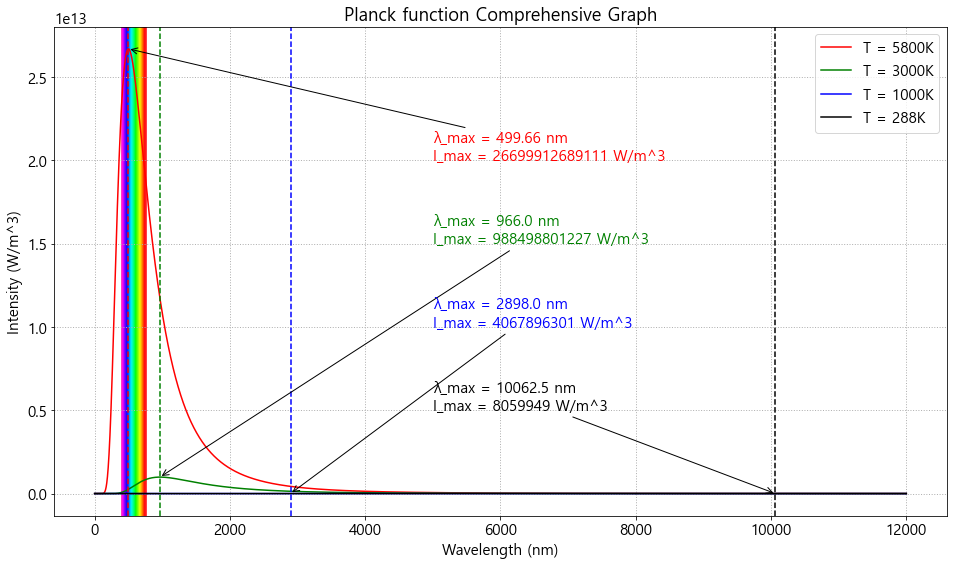

In [3]:
# 1nm 부터 12000nm 까지 배열 생성
wavelength_set = np.arange(1e-9,12000e-9,1e-9)

# 각각의 온도를 fix시켜 wavelength에 따른 intensity set을 만든다.
intensity_5800 = planck(wavelength_set, 5800)
intensity_3000 = planck(wavelength_set, 3000)
intensity_1000 = planck(wavelength_set, 1000)
intensity_288  = planck(wavelength_set,  288)

# 한글 깨짐 해결, fontsize, 그래프 크기 조절, 그리드 형성
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (16,9)
plt.grid(linestyle=':', linewidth=1.0)

# 가시광선 영역 표시
plot_visible()

# 그래프그리기
plt.plot(wavelength_set*1e+9, intensity_5800, 'r-', label='T = 5800K') 
plt.plot(wavelength_set*1e+9, intensity_3000, 'g-', label='T = 3000K') 
plt.plot(wavelength_set*1e+9, intensity_1000, 'b-', label='T = 1000K') 
plt.plot(wavelength_set*1e+9, intensity_288,  'k-', label='T = 288K')

# λ_max를 구하고 I_max를 구하고, 그래프에 표시
lambda_max = wein(5800)
intensity_max = planck(lambda_max, 5800)
plt.axvline(lambda_max*1e+9, linestyle='--', color='red', alpha=1)
plt.annotate('λ_max = ' + str(round(lambda_max*1e+9,2) )+" nm\nI_max = " + str(int(intensity_max) ) + ' W/m^3', (lambda_max*1e+9, int(intensity_max)), xytext = (5000, 2.0e+13), color='red', arrowprops = dict(color='black', arrowstyle = '->'))

lambda_max = wein(3000)
intensity_max = planck(lambda_max, 3000)
plt.axvline(lambda_max*1e+9, linestyle='--', color='green', alpha=1)
plt.annotate('λ_max = ' + str(round(lambda_max*1e+9,2) )+" nm\nI_max = " + str(int(intensity_max) ) + ' W/m^3', (lambda_max*1e+9, round(intensity_max,2)), xytext = (5000, 1.5e+13), color='green',arrowprops = dict(color='black',arrowstyle = '->'))

lambda_max = wein(1000)
intensity_max = planck(lambda_max, 1000)
plt.axvline(lambda_max*1e+9, linestyle='--', color='blue', alpha=1)
plt.annotate('λ_max = ' + str(round(lambda_max*1e+9,2) )+" nm\nI_max = " + str(int(intensity_max) ) + ' W/m^3', (lambda_max*1e+9, round(intensity_max,2)), xytext = (5000, 1.0e+13), color='blue',arrowprops = dict(color='black',arrowstyle = '->'))

lambda_max = wein(288)
intensity_max = planck(lambda_max, 288)
plt.axvline(lambda_max*1e+9, linestyle='--', color='black', alpha=1)
plt.annotate('λ_max = ' + str(round(lambda_max*1e+9,2) )+" nm\nI_max = " + str(int(intensity_max) ) + ' W/m^3', (lambda_max*1e+9, round(intensity_max,2)), xytext = (5000, 0.5e+13), color='black',arrowprops = dict(color='black',arrowstyle = '->'))


plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (W/m^3)')
plt.title('Planck function Comprehensive Graph')
plt.legend()
plt.show()

## 1-2. T=5000K, T=3000K 일 때 비교 그래프

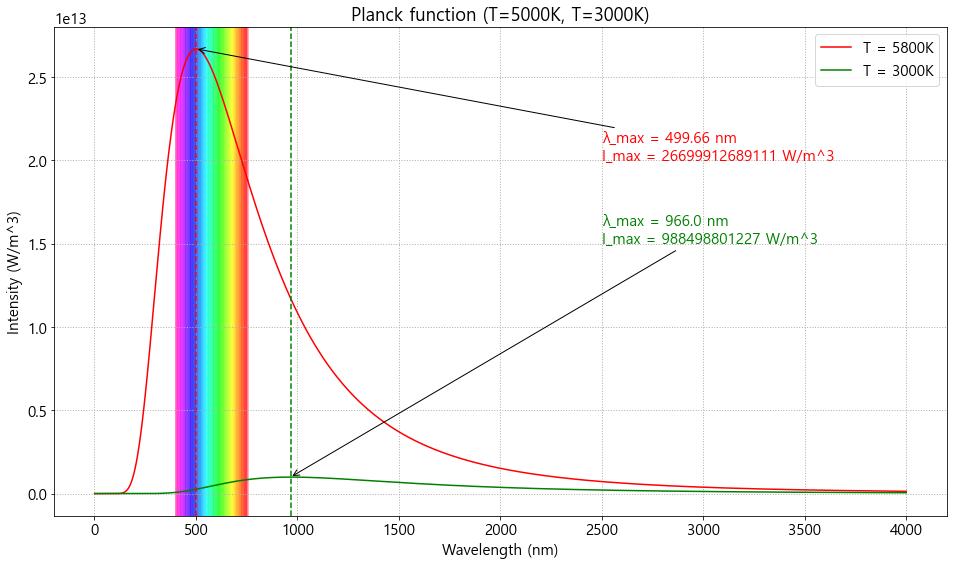

In [4]:
# 1nm 부터 4000nm 까지 배열 생성
wavelength_set = np.arange(1e-9,4000e-9,1e-9)

# 각각의 온도를 fix시켜 wavelength에 따른 intensity set을 만든다.
intensity_5800 = planck(wavelength_set, 5800)
intensity_3000 = planck(wavelength_set, 3000)

# 한글 깨짐 해결, fontsize, 그래프 크기 조절, 그리드 형성
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (16,9)
plt.grid(linestyle=':', linewidth=1.0)

# 가시광선 영역 표시
plot_visible()

# 그래프그리기
plt.plot(wavelength_set*1e+9, intensity_5800, 'r-', label='T = 5800K') 
plt.plot(wavelength_set*1e+9, intensity_3000, 'g-', label='T = 3000K')

# λ_max를 구하고 I_max를 구하고, 그래프에 표시
lambda_max = wein(5800)
intensity_max = planck(lambda_max, 5800)
plt.axvline(lambda_max*1e+9, linestyle='--', color='red', alpha=1)
plt.annotate('λ_max = ' + str(round(lambda_max*1e+9,2) )+" nm\nI_max = " + str(int(intensity_max) ) + ' W/m^3', (lambda_max*1e+9, int(intensity_max)), xytext = (2500, 2.0e+13), color='red', arrowprops = dict(color='black', arrowstyle = '->'))

lambda_max = wein(3000)
intensity_max = planck(lambda_max, 3000)
plt.axvline(lambda_max*1e+9, linestyle='--', color='green', alpha=1)
plt.annotate('λ_max = ' + str(round(lambda_max*1e+9,2) )+" nm\nI_max = " + str(int(intensity_max) ) + ' W/m^3', (lambda_max*1e+9, round(intensity_max,2)), xytext = (2500, 1.5e+13), color='green',arrowprops = dict(color='black',arrowstyle = '->'))


plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (W/m^3)')
plt.title('Planck function (T=5000K, T=3000K)')
plt.legend()
plt.show()

## 1-3. T=3000K, T=1000K 일 때 비교 그래프

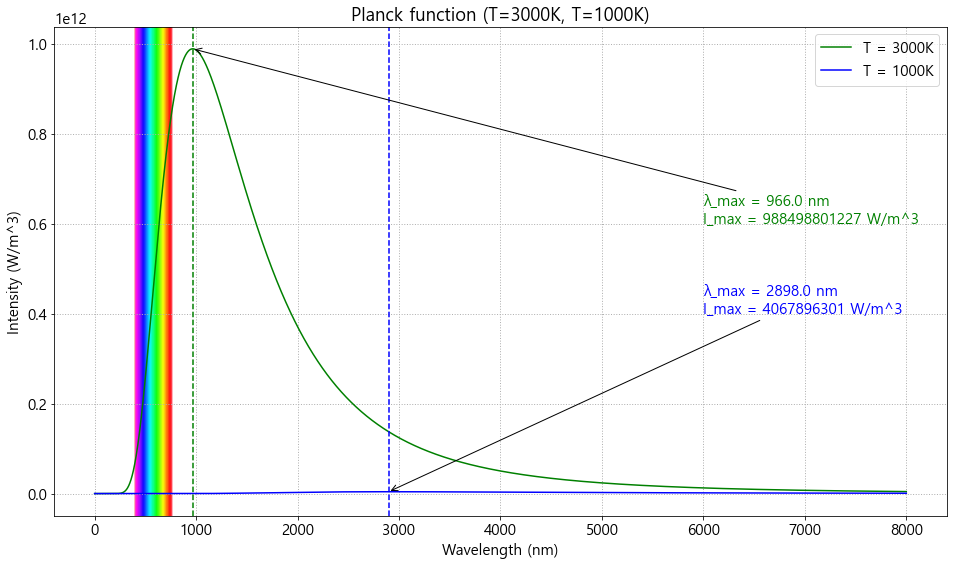

In [5]:
# 1nm 부터 8000nm 까지 배열 생성
wavelength_set = np.arange(1e-9,8000e-9,1e-9)

# 각각의 온도를 fix시켜 wavelength에 따른 intensity set을 만든다.
intensity_3000 = planck(wavelength_set, 3000)
intensity_1000 = planck(wavelength_set, 1000)


# 한글 깨짐 해결, fontsize, 그래프 크기 조절, 그리드 형성
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (16,9)
plt.grid(linestyle=':', linewidth=1.0)

# 가시광선 영역 표시
plot_visible()

# 그래프그리기
plt.plot(wavelength_set*1e+9, intensity_3000, 'g-', label='T = 3000K') 
plt.plot(wavelength_set*1e+9, intensity_1000, 'b-', label='T = 1000K') 

# λ_max를 구하고 I_max를 구하고, 그래프에 표시
lambda_max = wein(3000)
intensity_max = planck(lambda_max, 3000)
plt.axvline(lambda_max*1e+9, linestyle='--', color='green', alpha=1)
plt.annotate('λ_max = ' + str(round(lambda_max*1e+9,2) )+" nm\nI_max = " + str(int(intensity_max) ) + ' W/m^3', (lambda_max*1e+9, round(intensity_max,2)), xytext = (6000, 0.6e+12), color='green',arrowprops = dict(color='black',arrowstyle = '->'))

lambda_max = wein(1000)
intensity_max = planck(lambda_max, 1000)
plt.axvline(lambda_max*1e+9, linestyle='--', color='blue', alpha=1)
plt.annotate('λ_max = ' + str(round(lambda_max*1e+9,2) )+" nm\nI_max = " + str(int(intensity_max) ) + ' W/m^3', (lambda_max*1e+9, round(intensity_max,2)), xytext = (6000, 0.4e+12), color='blue',arrowprops = dict(color='black',arrowstyle = '->'))


plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (W/m^3)')
plt.title('Planck function (T=3000K, T=1000K)')
plt.legend()
plt.show()

## 1-4. T=1000K, T=288K 일 때 비교 그래프

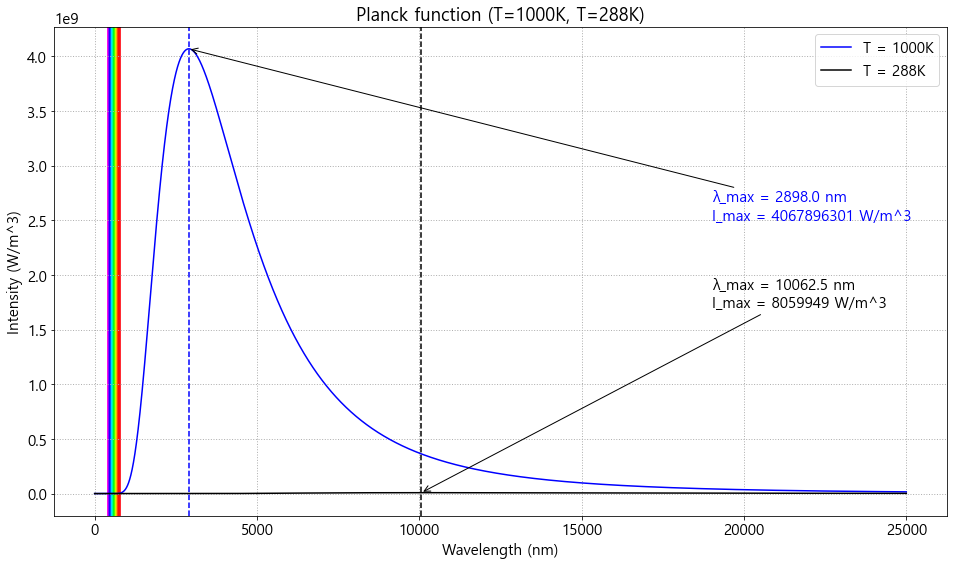

In [6]:
# 1nm 부터 25000nm 까지 배열 생성
wavelength_set = np.arange(1e-9,25000e-9,1e-9)

# 각각의 온도를 fix시켜 wavelength에 따른 intensity set을 만든다.
intensity_1000 = planck(wavelength_set, 1000)
intensity_288  = planck(wavelength_set,  288)

# 한글 깨짐 해결, fontsize, 그래프 크기 조절, 그리드 형성
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (16,9)
plt.grid(linestyle=':', linewidth=1.0)

# 가시광선 영역 표시
plot_visible()

# 그래프그리기
plt.plot(wavelength_set*1e+9, intensity_1000, 'b-', label='T = 1000K') 
plt.plot(wavelength_set*1e+9, intensity_288,  'k-', label='T = 288K')

# λ_max를 구하고 I_max를 구하고, 그래프에 표시

lambda_max = wein(1000)
intensity_max = planck(lambda_max, 1000)
plt.axvline(lambda_max*1e+9, linestyle='--', color='blue', alpha=1)
plt.annotate('λ_max = ' + str(round(lambda_max*1e+9,2) )+" nm\nI_max = " + str(int(intensity_max) ) + ' W/m^3', (lambda_max*1e+9, round(intensity_max,2)), xytext = (19000, 2.5e+9), color='blue',arrowprops = dict(color='black',arrowstyle = '->'))

lambda_max = wein(288)
intensity_max = planck(lambda_max, 288)
plt.axvline(lambda_max*1e+9, linestyle='--', color='black', alpha=1)
plt.annotate('λ_max = ' + str(round(lambda_max*1e+9,2) )+" nm\nI_max = " + str(int(intensity_max) ) + ' W/m^3', (lambda_max*1e+9, round(intensity_max,2)), xytext = (19000, 1.7e+9), color='black',arrowprops = dict(color='black',arrowstyle = '->'))


plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (W/m^3)')
plt.title('Planck function (T=1000K, T=288K)')
plt.legend()
plt.show()

## 1-5. T=288K 일 때 비교 그래프

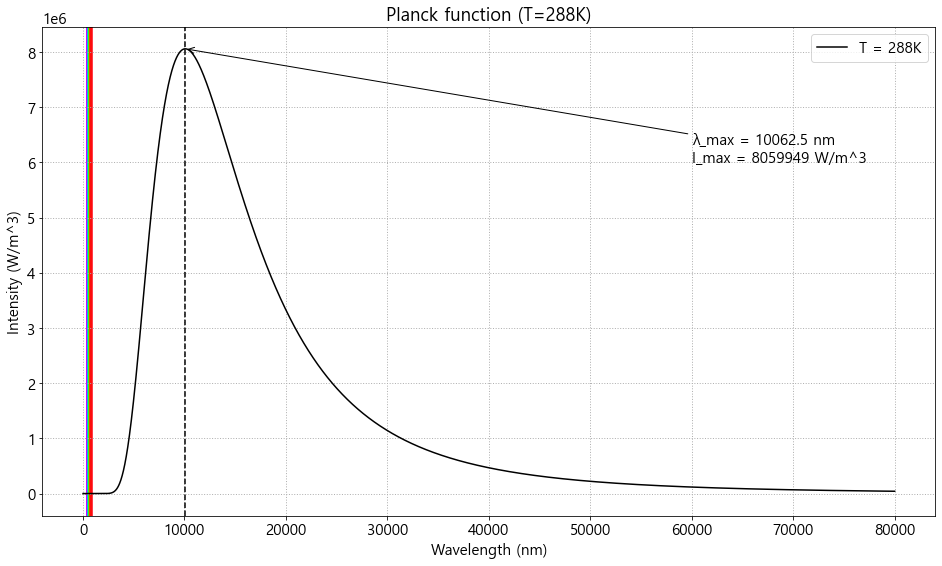

In [7]:
# 1nm 부터 60000nm 까지 배열 생성
wavelength_set = np.arange(1e-9,80000e-9,1e-9)

# 각각의 온도를 fix시켜 wavelength에 따른 intensity set을 만든다.
intensity_288  = planck(wavelength_set,  288)

# 한글 깨짐 해결, fontsize, 그래프 크기 조절, 그리드 형성
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (16,9)
plt.grid(linestyle=':', linewidth=1.0)

# 가시광선 영역 표시
plot_visible()

# 그래프그리기
plt.plot(wavelength_set*1e+9, intensity_288,  'k-', label='T = 288K')

# λ_max를 구하고 I_max를 구하고, 그래프에 표시

lambda_max = wein(288)
intensity_max = planck(lambda_max, 288)
plt.axvline(lambda_max*1e+9, linestyle='--', color='black', alpha=1)
plt.annotate('λ_max = ' + str(round(lambda_max*1e+9,2) )+" nm\nI_max = " + str(int(intensity_max) ) + ' W/m^3', (lambda_max*1e+9, round(intensity_max,2)), xytext = (60000, 6.0e+6), color='black',arrowprops = dict(color='black',arrowstyle = '->'))


plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (W/m^3)')
plt.title('Planck function (T=288K)')
plt.legend()
plt.show()

## 2. 각 온도에 대해 Total Energy와 λ_max를 구하라

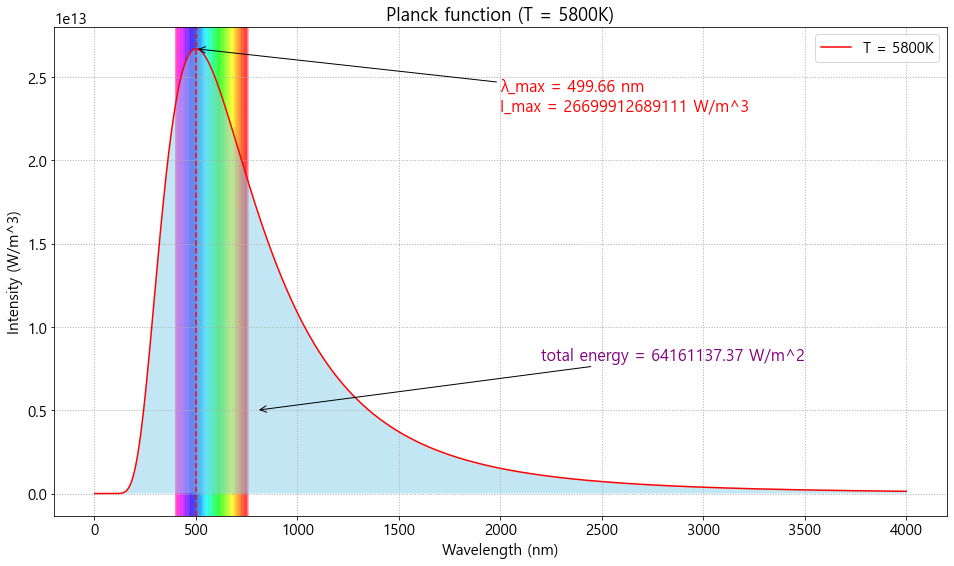

In [8]:
# T = 5800일때 그래프
temperature = 5800

# 1nm 부터 4000nm 까지 배열 생성
wavelength_set = np.arange(1e-9,4000e-9,1e-9)

# 각각의 온도를 fix시켜 wavelength에 따른 intensity set을 만든다.
intensity_5800 = planck(wavelength_set, temperature)

# 한글 깨짐 해결, fontsize, 그래프 크기 조절, 그리드 형성
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (16,9)
plt.grid(linestyle=':', linewidth=1.0)

# 가시광선 영역 표시
plot_visible()

# 그래프 그리기
plt.plot(wavelength_set*1e+9, intensity_5800, 'r-', label='T = 5800K') 

# λ_max를 구하고, 그래프에 표시, 텍스트로 수치를 알려줌
lambda_max = wein(temperature)
intensity_max = planck(lambda_max, 5800)
plt.axvline(lambda_max*1e+9, linestyle='--', color='red', alpha=1)
plt.annotate('λ_max = ' + str(round(lambda_max*1e+9,2) )+" nm\nI_max = " + str(int(intensity_max) ) + ' W/m^3', (lambda_max*1e+9, int(intensity_max)), xytext = (2000, 2.3e+13), color='red', fontsize=16,arrowprops = dict(color='black', arrowstyle = '->'))

# 적분 값을 구하고, 텍스트로 수치를 알려줌
total_energy = stefan_boltzman(temperature)
plt.annotate('total energy = ' + str(round(total_energy,2) )+" W/m^2", (800, 0.5e+13), xytext = (3500, 0.8e+13), color='purple', fontsize=16, horizontalalignment='right', arrowprops = dict(color='black', arrowstyle = '->'))

#적분면적 색칠
plt.fill_between(wavelength_set*1e+9, intensity_5800, facecolor='skyblue',alpha=0.5)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (W/m^3)')
plt.title('Planck function (T = 5800K)')
plt.legend()
plt.show()

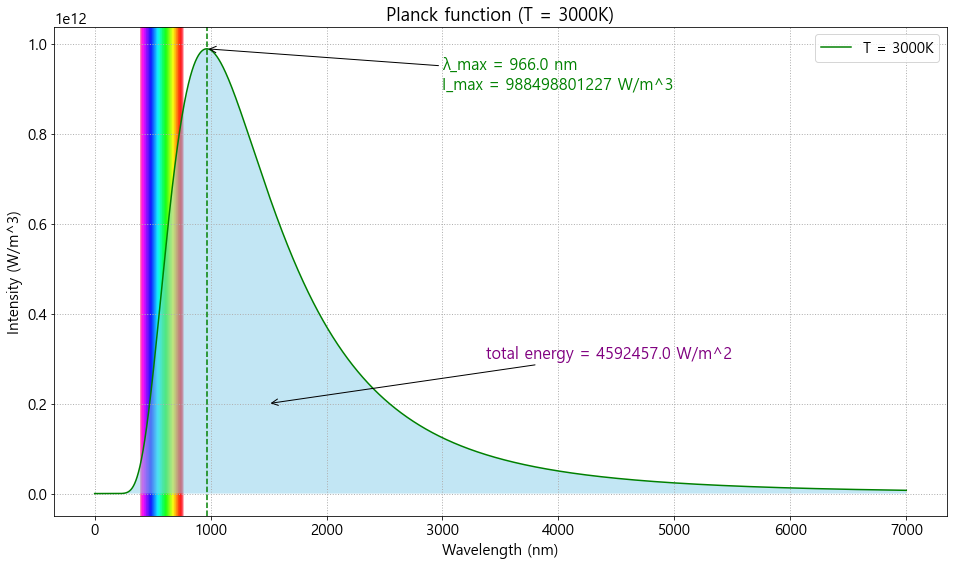

In [9]:
# T = 3000일때 그래프
temperature = 3000

# 1nm 부터 7000nm 까지 배열 생성
wavelength_set = np.arange(1e-9,7000e-9,1e-9)

# 각각의 온도를 fix시켜 wavelength에 따른 intensity set을 만든다.
intensity_3000 = planck(wavelength_set, temperature)

# 그리드 형성
plt.grid(linestyle=':', linewidth=1.0)

# 가시광선 영역 표시
plot_visible()

# 그래프 그리기
plt.plot(wavelength_set*1e+9, intensity_3000, 'g-', label='T = 3000K') 

# λ_max를 구하고, 그래프에 표시, 텍스트로 수치를 알려줌
lambda_max = wein(temperature)
intensity_max = planck(lambda_max, 3000)
plt.axvline(lambda_max*1e+9, linestyle='--', color='green', alpha=1)
plt.annotate('λ_max = ' + str(round(lambda_max*1e+9,2) )+" nm\nI_max = " + str(int(intensity_max) ) + ' W/m^3', (lambda_max*1e+9, round(intensity_max,2)), xytext = (3000, 0.9e+12), color='green', fontsize=16, arrowprops = dict(color='black',arrowstyle = '->'))

# 적분 값을 구하고, 텍스트로 수치를 알려줌
total_energy = stefan_boltzman(temperature)
plt.annotate('total energy = ' + str(round(total_energy,2) )+" W/m^2", (1500, 0.2e+12), xytext = (5500, 0.3e+12), color='purple', fontsize=16, horizontalalignment='right', arrowprops = dict(color='black', arrowstyle = '->'))

#적분면적 색칠
plt.fill_between(wavelength_set*1e+9, intensity_3000, facecolor='skyblue',alpha=0.5)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (W/m^3)')
plt.title('Planck function (T = 3000K)')
plt.legend()
plt.show()

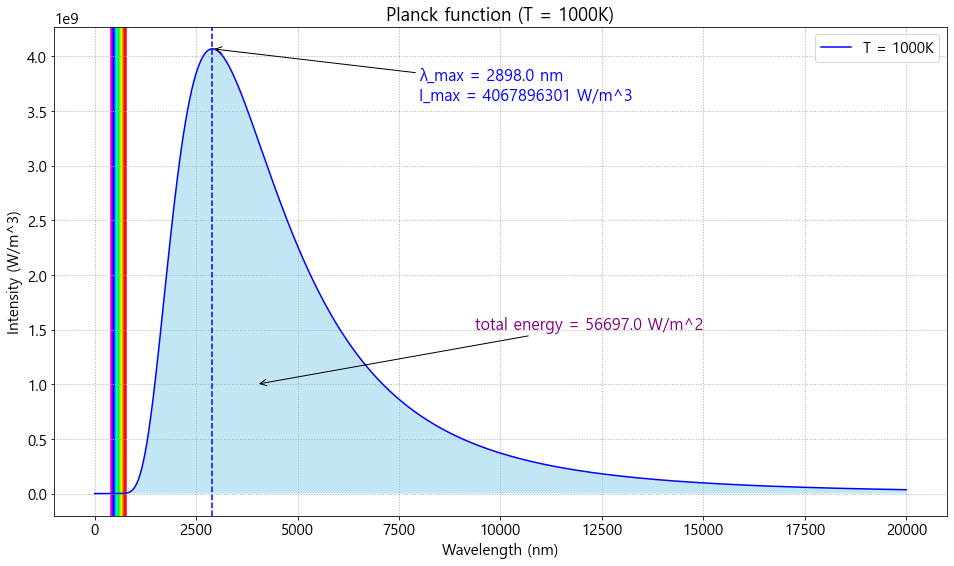

In [10]:
# T = 1000일때 그래프
temperature = 1000

# 1nm 부터 20000nm 까지 배열 생성
wavelength_set = np.arange(1e-9,20000e-9,1e-9)

# 각각의 온도를 fix시켜 wavelength에 따른 intensity set을 만든다.
intensity_1000 = planck(wavelength_set, temperature)

# 그리드 형성
plt.grid(linestyle=':', linewidth=1.0)

# 가시광선 영역 표시
plot_visible()

# 그래프 그리기
plt.plot(wavelength_set*1e+9, intensity_1000, 'b-', label='T = 1000K') 

# λ_max를 구하고, 그래프에 표시, 텍스트로 수치를 알려줌
lambda_max = wein(temperature)
intensity_max = planck(lambda_max, 1000)
plt.axvline(lambda_max*1e+9, linestyle='--', color='blue', alpha=1)
plt.annotate('λ_max = ' + str(round(lambda_max*1e+9,2) )+" nm\nI_max = " + str(int(intensity_max) ) + ' W/m^3', (lambda_max*1e+9, round(intensity_max,2)), xytext = (8000, 3.6e+9), color='blue', fontsize=16, arrowprops = dict(color='black',arrowstyle = '->'))

# 적분 값을 구하고, 텍스트로 수치를 알려줌
total_energy = stefan_boltzman(temperature)
plt.annotate('total energy = ' + str(round(total_energy,2) )+" W/m^2", (4000, 1.0e+9), xytext = (15000, 1.5e+9), color='purple', fontsize=16, horizontalalignment='right', arrowprops = dict(color='black', arrowstyle = '->'))

#적분면적 색칠
plt.fill_between(wavelength_set*1e+9, intensity_1000, facecolor='skyblue',alpha=0.5)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (W/m^3)')
plt.title('Planck function (T = 1000K)')
plt.legend()
plt.show()

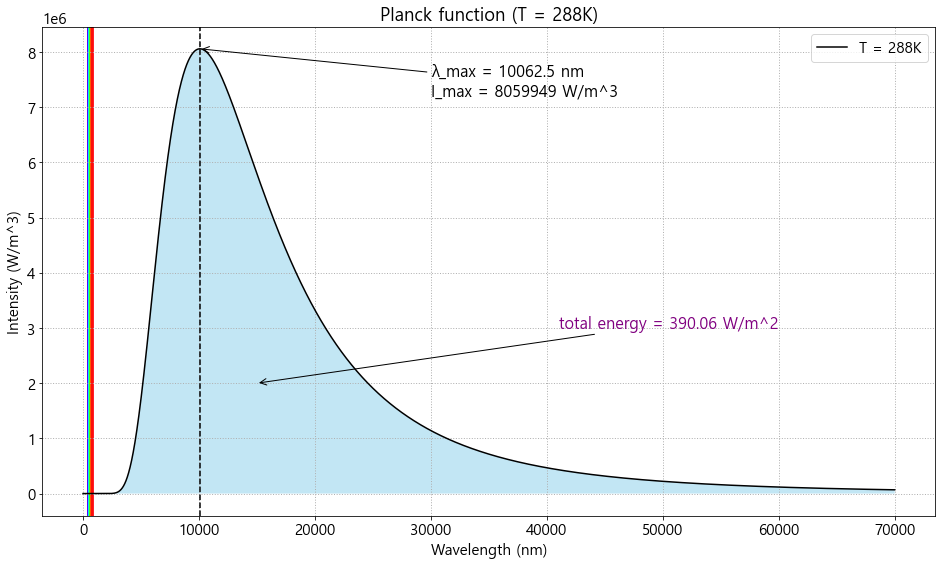

In [11]:
# T = 288K일때 그래프
temperature = 288

# 1nm 부터 60000nm 까지 배열 생성
wavelength_set = np.arange(1e-9,70000e-9,1e-9)

# 각각의 온도를 fix시켜 wavelength에 따른 intensity set을 만든다.
intensity_288 = planck(wavelength_set, temperature)

# 그리드 형성
plt.grid(linestyle=':', linewidth=1.0)

# 가시광선 영역 표시
plot_visible()

# 그래프 그리기
plt.plot(wavelength_set*1e+9, intensity_288, 'k-', label='T = 288K') 

# λ_max를 구하고, 그래프에 표시, 텍스트로 수치를 알려줌
lambda_max = wein(temperature)
intensity_max = planck(lambda_max, 288)
plt.axvline(lambda_max*1e+9, linestyle='--', color='black', alpha=1)
plt.annotate('λ_max = ' + str(round(lambda_max*1e+9,2) )+" nm\nI_max = " + str(int(intensity_max) ) + ' W/m^3', (lambda_max*1e+9, round(intensity_max,2)), xytext = (30000, 7.2e+6), color='black', fontsize=16, arrowprops = dict(color='black',arrowstyle = '->'))

# 적분 값을 구하고, 텍스트로 수치를 알려줌
total_energy = stefan_boltzman(temperature)
plt.annotate('total energy = ' + str(round(total_energy,2) )+" W/m^2", (15000, 2.0e+6), xytext = (60000, 3.0e+6), color='purple', fontsize=16, horizontalalignment='right', arrowprops = dict(color='black', arrowstyle = '->'))


#적분면적 색칠
plt.fill_between(wavelength_set*1e+9, intensity_288, facecolor='skyblue',alpha=0.5)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (W/m^3)')
plt.title('Planck function (T = 288K)')
plt.legend()
plt.show()

## 3. T = 5800K 일 때 UV, Visible Light, Infrared 영역의 비율을 계산하라

In [12]:
from scipy.integrate import quad
import numpy as np

# 각각의 상수 선언
h = 6.63e-34  #플랑크 상수
k = 1.38e-23  #볼츠만 상수
c = 3.0e+8    #빛의 속도

# wavelength = x로 놓고 적분, T=5800K으로 고정
def f(x) :
    T= 5800
    a = (2.0*np.pi*h*(c**2))
    b = (h*c/(x*k*T))
    return a / ( (x**5) * (np.exp(b) - 1) )

F = quad(f, 0, 4000e-9)
print(F)

(63228125.48919242, 5.032123513521198e-05)


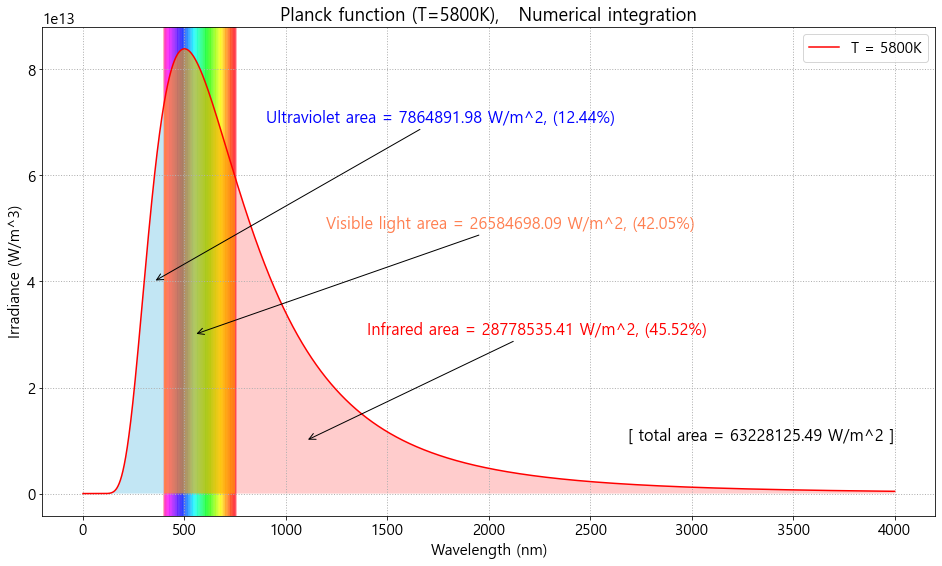

In [66]:
def planck(wl, T):
    a = 2.0*np.pi*h*(c**2)
    b = h*c/(wl*k*T)
    intensity = a / ( (wl**5) * (np.exp(b) - 1) )
    return intensity


# T = 5800일때 그래프
temperature = 5800

# 1nm 부터 4000nm 까지 배열 생성, 자외선, 가시광선, 적외선 배열 생성
wavelength_set = np.arange(1e-9,4000e-9,1e-9)
uv = np.arange(1e-9,400e-9,1e-9)
visible = np.arange(400e-9,750e-9,1e-9)
ir  = np.arange(750e-9,4000e-9,1e-9)

# 각각의 온도를 fix시켜 wavelength에 따른 intensity set을 만든다.
intensity_5800 = planck(wavelength_set, temperature)

# 한글 깨짐 해결, fontsize, 그래프 크기 조절, 그리드 형성
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (16,9)
plt.grid(linestyle=':', linewidth=1.0)

# 가시광선 영역 표시
plot_visible()

# 그래프 그리기
plt.plot(wavelength_set*1e+9, intensity_5800, 'r-', label='T = 5800K') 

#적분면적 색칠 
plt.fill_between(wavelength_set*1e+9, 0, intensity_5800, where=(0 <= wavelength_set*1e+9) & (wavelength_set*1e+9 <= 400),     facecolor='skyblue',alpha=0.5)
plt.fill_between(wavelength_set*1e+9, 0, intensity_5800, where=(400 <= wavelength_set*1e+9) & (wavelength_set*1e+9 <= 750),   facecolor='orange',alpha=0.6)
plt.fill_between(wavelength_set*1e+9, 0, intensity_5800, where=(750 <= wavelength_set*1e+9) & (wavelength_set*1e+9 <= 4000),  facecolor='red',alpha=0.2)

# 자외선, 가시광선, 적외선 영역의 면적계산, 전체 면적계산
uv,err1       = quad(f, 0, 400e-9)
visible, err2 = quad(f, 400e-9, 750e-9)
ir,err3       = quad(f, 750e-9, 4000e-9)
total,err4    = quad(f, 0, 4000e-9)
plt.annotate('Ultraviolet area = ' + str(round(uv,2) )+" W/m^2, ("+str(round(uv/total*100,2))+"%)", (350, 4.0e+13), xytext = (900, 7.0e+13), color='blue', fontsize=16, horizontalalignment='left', arrowprops = dict(color='black', arrowstyle = '->'))
plt.annotate('Visible light area = ' + str(round(visible,2) )+" W/m^2, ("+str(round(visible/total*100,2))+"%)", (550, 3.0e+13), xytext = (1200, 5.0e+13), color='coral', fontsize=16, horizontalalignment='left', arrowprops = dict(color='black', arrowstyle = '->'))
plt.annotate('Infrared area = ' + str(round(ir,2) )+" W/m^2, ("+str(round(ir/total*100,2))+"%)", (1100, 1.0e+13), xytext = (1400, 3.0e+13), color='red', fontsize=16, horizontalalignment='left', arrowprops = dict(color='black', arrowstyle = '->'))
plt.text(4000, 1.0e+13, '[ total area = ' + str(round(total, 2))+" W/m^2 ]", fontsize=16, horizontalalignment='right')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Irradiance (W/m^3)')
plt.title('Planck function (T=5800K),   Numerical integration')
plt.legend()
plt.show()

## 3-1. 몬테카를로 적분(monte carlo integration)을 이용한 면적계산 및 비율 비교

In [59]:
import random as rd
import numpy as np

# 각각의 상수 선언
h = 6.63e-34  #플랑크 상수
k = 1.38e-23  #볼츠만 상수
c = 3.0e+8    #빛의 속도

# placnk 함수
def planck(wl, T):
    a = 2.0 * np.pi * h * (c ** 2)
    b = h * c / (wl * k * T)
    intensity = a / ((wl ** 5) * (np.exp(b) - 1))
    return intensity

# 빈의 법칙을 이용한 intensity가 최대가 되는 wavelength 계산
def wein(T):
    max_point = (2898 * (10 ** -6)) / T
    return max_point

def montecarlo_integration(start, end):
    up = 0
    down = 0
    T = 5800
    y1 = planck(start, T)
    y2 = planck(end, T)
    y3 = planck(wein(T), T)

    if (y2 <= y1 and y3 <= y1):
        height = y1
    elif ((y1 <= y2) and (y3 <= y2)):
        height = y2
    elif ((y1 <= y3) and (y2 <= y3)):
        height = y3

    length = end - start
    quadrangle_area = length * height
    repeat = 100000
    for i in range(repeat):
        x = start + rd.random() * length
        fx = planck(x, T)
        y = rd.random() * height
        if (y <= fx):
            down += 1
        else:
            up += 1
    area = quadrangle_area * (down / repeat)
    return area

uv = montecarlo_integration(0.1e-15, 400e-9)
visible = montecarlo_integration(400e-9, 750e-9)
ir = montecarlo_integration(750e-9, 4000e-9)
total = montecarlo_integration(0.1e-15, 4000e-9)

print("Ultraviolet area  : {:11.2f}, rate = {:%}".format(uv, uv/total))
print("Visble light area : {:11.2f}, rate = {:%}".format(visible, visible/total))
print("infrared area     : {:11.2f}, rate = {:%}".format(ir, ir/total))
print("total area        : {:11.2f}, rate = {:%}".format(total, total/total))

Ultraviolet area  :  7764962.46, rate = 12.406454%
Visble light area : 26606647.40, rate = 42.510722%
infrared area     : 28547804.13, rate = 45.612201%
total area        : 62588087.01, rate = 100.000000%


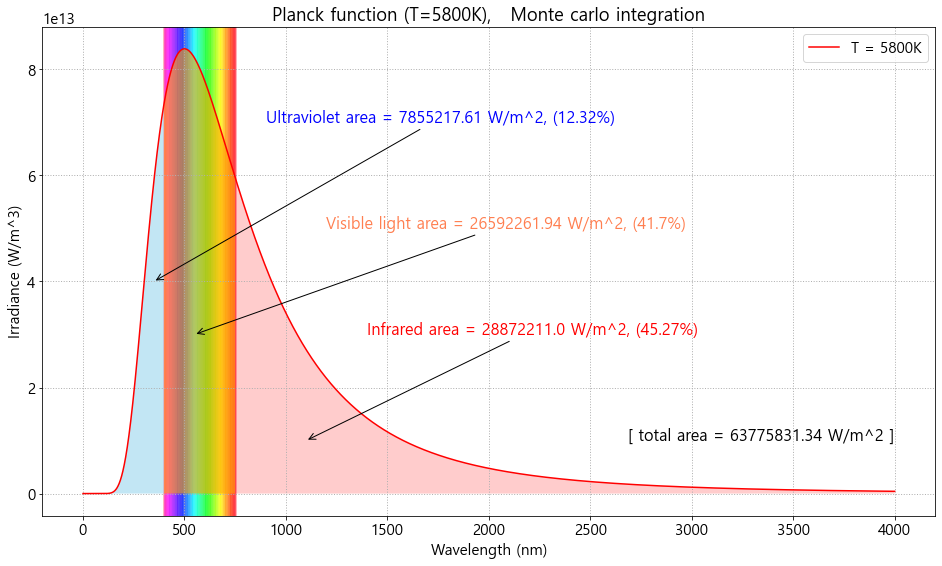

In [64]:
def planck(wl, T):
    a = 2.0*np.pi*h*(c**2)
    b = h*c/(wl*k*T)
    intensity = a / ( (wl**5) * (np.exp(b) - 1) )
    return intensity


# T = 5800일때 그래프
temperature = 5800

# 1nm 부터 4000nm 까지 배열 생성, 자외선, 가시광선, 적외선 배열 생성
wavelength_set = np.arange(1e-9,4000e-9,1e-9)
uv = np.arange(1e-9,400e-9,1e-9)
visible = np.arange(400e-9,750e-9,1e-9)
ir  = np.arange(750e-9,4000e-9,1e-9)

# 각각의 온도를 fix시켜 wavelength에 따른 intensity set을 만든다.
intensity_5800 = planck(wavelength_set, temperature)

# 한글 깨짐 해결, fontsize, 그래프 크기 조절, 그리드 형성
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (16,9)
plt.grid(linestyle=':', linewidth=1.0)

# 가시광선 영역 표시
plot_visible()

# 그래프 그리기
plt.plot(wavelength_set*1e+9, intensity_5800, 'r-', label='T = 5800K') 

#적분면적 색칠 
plt.fill_between(wavelength_set*1e+9, 0, intensity_5800, where=(0 <= wavelength_set*1e+9) & (wavelength_set*1e+9 <= 400),     facecolor='skyblue',alpha=0.5)
plt.fill_between(wavelength_set*1e+9, 0, intensity_5800, where=(400 <= wavelength_set*1e+9) & (wavelength_set*1e+9 <= 750),   facecolor='orange',alpha=0.6)
plt.fill_between(wavelength_set*1e+9, 0, intensity_5800, where=(750 <= wavelength_set*1e+9) & (wavelength_set*1e+9 <= 4000),  facecolor='red',alpha=0.2)

# 자외선, 가시광선, 적외선 영역의 면적계산, 전체 면적계산
uv = montecarlo_integration(0.1e-15, 400e-9)
visible = montecarlo_integration(400e-9, 750e-9)
ir = montecarlo_integration(750e-9, 4000e-9)
total = montecarlo_integration(0.1e-15, 4000e-9)

plt.annotate('Ultraviolet area = ' + str(round(uv,2) )+" W/m^2, ("+str(round(uv/total*100,2))+"%)", (350, 4.0e+13), xytext = (900, 7.0e+13), color='blue', fontsize=16, horizontalalignment='left', arrowprops = dict(color='black', arrowstyle = '->'))
plt.annotate('Visible light area = ' + str(round(visible,2) )+" W/m^2, ("+str(round(visible/total*100,2))+"%)", (550, 3.0e+13), xytext = (1200, 5.0e+13), color='coral', fontsize=16, horizontalalignment='left', arrowprops = dict(color='black', arrowstyle = '->'))
plt.annotate('Infrared area = ' + str(round(ir,2) )+" W/m^2, ("+str(round(ir/total*100,2))+"%)", (1100, 1.0e+13), xytext = (1400, 3.0e+13), color='red', fontsize=16, horizontalalignment='left', arrowprops = dict(color='black', arrowstyle = '->'))
plt.text(4000, 1.0e+13, '[ total area = ' + str(round(total, 2))+" W/m^2 ]", fontsize=16, horizontalalignment='right')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Irradiance (W/m^3)')
plt.title('Planck function (T=5800K),   Monte carlo integration')
plt.legend()
plt.show()